In [283]:
# Exploratory Data Analysis (EDA)
# Import packages
# Suppress warnings
import warnings
warnings.simplefilter('ignore')
!pip install haversine
# Core Python Libraries
import numpy as np
import pandas as pd
from datetime import datetime

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Date and Time Handling
import datetime as dt

# Geospatial Distance
from haversine import haversine

# Machine Learning & Modeling
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, ShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.cluster import KMeans

# Evaluation Metrics
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn import metrics

# Statsmodels for regression analysis
import statsmodels.formula.api as sm

In [289]:
# Load the taxi dataset from a local CSV file into a pandas DataFrame
taxi = pd.read_csv("/Users/bcoeur34/Desktop/Python /taxi_tripdata.csv")
# Display the first five rows of the DataFrame to preview the data
taxi

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1.0,2021-07-01 00:30:52,2021-07-01 00:35:36,N,1.0,74,168,1.0,1.20,6.00,0.50,0.5,0.00,0.00,NaN,0.3,7.30,2.0,1.0,0.0
1,2.0,2021-07-01 00:25:36,2021-07-01 01:01:31,N,1.0,116,265,2.0,13.69,42.00,0.50,0.5,0.00,0.00,NaN,0.3,43.30,2.0,1.0,0.0
2,2.0,2021-07-01 00:05:58,2021-07-01 00:12:00,N,1.0,97,33,1.0,0.95,6.50,0.50,0.5,2.34,0.00,NaN,0.3,10.14,1.0,1.0,0.0
3,2.0,2021-07-01 00:41:40,2021-07-01 00:47:23,N,1.0,74,42,1.0,1.24,6.50,0.50,0.5,0.00,0.00,NaN,0.3,7.80,2.0,1.0,0.0
4,2.0,2021-07-01 00:51:32,2021-07-01 00:58:46,N,1.0,42,244,1.0,1.10,7.00,0.50,0.5,0.00,0.00,NaN,0.3,8.30,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83686,NaN,2021-07-02 07:59:00,2021-07-02 08:33:00,NaN,NaN,218,169,NaN,18.04,50.24,2.75,0.0,0.00,6.55,NaN,0.3,59.84,NaN,NaN,NaN
83687,NaN,2021-07-02 07:02:00,2021-07-02 07:18:00,NaN,NaN,74,137,NaN,5.56,19.16,0.00,0.0,3.66,0.00,NaN,0.3,25.87,NaN,NaN,NaN
83688,NaN,2021-07-02 07:53:00,2021-07-02 08:15:00,NaN,NaN,69,75,NaN,5.13,22.45,0.00,0.0,0.00,0.00,NaN,0.3,22.75,NaN,NaN,NaN
83689,NaN,2021-07-02 07:58:00,2021-07-02 08:30:00,NaN,NaN,117,82,NaN,12.58,48.62,2.75,0.0,0.00,2.45,NaN,0.3,54.12,NaN,NaN,NaN


In [291]:
# Replace spaces in column names with underscores to make them easier to work with
# This improves code readability and makes column access easier with dot notation
# For example, TAXI.loan_amount instead of loan_data['loan amount']
taxi.columns = taxi.columns.str.replace(' ', '_')
# Display the modified column names
taxi.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

In [293]:
# Write a Python script to standardize column names in a taxi dataset.
taxi.columns = taxi.columns.str.lower().str.replace(r'\s+', '_', regex=True)
taxi.head()

,vendorid,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,ratecodeid,pulocationid,dolocationid,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1.0,2021-07-01 00:30:52,2021-07-01 00:35:36,N,1.0,74,168,1.0,1.20,6.0,0.5,0.5,0.00,0.0,NaN,0.3,7.30,2.0,1.0,0.0
1,2.0,2021-07-01 00:25:36,2021-07-01 01:01:31,N,1.0,116,265,2.0,13.69,42.0,0.5,0.5,0.00,0.0,NaN,0.3,43.30,2.0,1.0,0.0
2,2.0,2021-07-01 00:05:58,2021-07-01 00:12:00,N,1.0,97,33,1.0,0.95,6.5,0.5,0.5,2.34,0.0,NaN,0.3,10.14,1.0,1.0,0.0
3,2.0,2021-07-01 00:41:40,2021-07-01 00:47:23,N,1.0,74,42,1.0,1.24,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,2.0,1.0,0.0
4,2.0,2021-07-01 00:51:32,2021-07-01 00:58:46,N,1.0,42,244,1.0,1.10,7.0,0.5,0.5,0.00,0.0,NaN,0.3,8.30,2.0,1.0,0.0


In [295]:
# Print summary of the DataFrame
# This displays information about the DataFrame including:
# - Total number of rows and columns
# - Column names and their data types
# - Non-null value counts for each column
# - Memory usage of the DataFrame
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83691 entries, 0 to 83690
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   vendorid               51173 non-null  float64
 1   lpep_pickup_datetime   83691 non-null  object 
 2   lpep_dropoff_datetime  83691 non-null  object 
 3   store_and_fwd_flag     51173 non-null  object 
 4   ratecodeid             51173 non-null  float64
 5   pulocationid           83691 non-null  int64  
 6   dolocationid           83691 non-null  int64  
 7   passenger_count        51173 non-null  float64
 8   trip_distance          83691 non-null  float64
 9   fare_amount            83691 non-null  float64
 10  extra                  83691 non-null  float64
 11  mta_tax                83691 non-null  float64
 12  tip_amount             83691 non-null  float64
 13  tolls_amount           83691 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [297]:
# Print a summary of descriptive statistics for the dataframe
# The describe() method provides statistical information about numeric columns
# This is useful for understanding data distribution and identifying outliers
taxi.describe()

,vendorid,ratecodeid,pulocationid,dolocationid,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,51173.000000,51173.000000,83691.000000,83691.000000,51173.000000,83691.000000,83691.000000,83691.000000,83691.000000,83691.000000,83691.000000,0.0,83691.000000,83691.000000,51173.000000,51173.000000,51173.000000
mean,1.851113,1.159244,108.362572,133.270005,1.307858,194.354699,20.388305,1.156707,0.293562,1.058618,0.624529,NaN,0.297745,24.204836,1.421726,1.034393,0.642815
std,0.355981,0.773260,70.370170,77.216791,0.984362,4405.549221,15.583552,1.367897,0.247773,2.368771,1.990481,NaN,0.031219,17.262183,0.511146,0.182239,1.164219
min,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,-150.000000,-4.500000,-0.500000,-1.140000,0.000000,NaN,-0.300000,-150.300000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,56.000000,69.000000,1.000000,1.350000,9.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.300000,11.760000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,132.000000,1.000000,2.760000,16.000000,0.500000,0.500000,0.000000,0.000000,NaN,0.300000,19.800000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,166.000000,205.000000,1.000000,6.200000,26.830000,2.750000,0.500000,1.660000,0.000000,NaN,0.300000,31.300000,2.000000,1.000000,0.000000
max,2.000000,5.000000,265.000000,265.000000,32.000000,260517.930000,480.000000,8.250000,0.500000,87.710000,30.050000,NaN,0.300000,480.310000,5.000000,2.000000,2.750000


In [299]:
taxi.describe(include = ['object'])

,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,83691,83691,51173
unique,69694,69832,2
top,2021-07-19 12:38:00,2021-07-21 13:27:00,N
freq,9,8,50977


In [301]:
# Check for missing data in each column of the taxi dataframe
for col in taxi.columns:
    # Calculate the percentage of missing values in the current column
    pct_missing = np.mean(taxi[col].isnull())
    # Print the column name and its corresponding percentage of missing values
    print('{} - {}%' .format(col, pct_missing))

vendorid - 0.38854835047974096%
lpep_pickup_datetime - 0.0%
lpep_dropoff_datetime - 0.0%
store_and_fwd_flag - 0.38854835047974096%
ratecodeid - 0.38854835047974096%
pulocationid - 0.0%
dolocationid - 0.0%
passenger_count - 0.38854835047974096%
trip_distance - 0.0%
fare_amount - 0.0%
extra - 0.0%
mta_tax - 0.0%
tip_amount - 0.0%
tolls_amount - 0.0%
ehail_fee - 1.0%
improvement_surcharge - 0.0%
total_amount - 0.0%
payment_type - 0.38854835047974096%
trip_type - 0.38854835047974096%
congestion_surcharge - 0.38854835047974096%


In [303]:
# Check for missing values in the taxi dataframe
# This will count the number of null values in each column and display the results
print(taxi.isnull().sum())

vendorid                 32518
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag       32518
ratecodeid               32518
pulocationid                 0
dolocationid                 0
passenger_count          32518
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                83691
improvement_surcharge        0
total_amount                 0
payment_type             32518
trip_type                32518
congestion_surcharge     32518
dtype: int64


In [305]:
# Fill missing values in categorical columns with the mode (most frequent value)
categorical_cols = ['vendorid', 'store_and_fwd_flag', 'ratecodeid', 'payment_type', 'trip_type']
for col in categorical_cols:
    taxi[col] = taxi[col].fillna(taxi[col].mode()[0])

# Fill missing values in passenger_count with the median value
taxi['passenger_count'] = taxi['passenger_count'].fillna(taxi['passenger_count'].median())

# Fill missing values in fee columns with 0
taxi['ehail_fee'] = taxi['ehail_fee'].fillna(0)
taxi['congestion_surcharge'] = taxi['congestion_surcharge'].fillna(0)

# Print the count of remaining missing values in each column
print(taxi.isna().sum())

vendorid                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
ratecodeid               0
pulocationid             0
dolocationid             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
ehail_fee                0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64


In [307]:
# Rename the DataFrame columns to more descriptive names
# This improves readability and makes the data more self-explanatory
# The dictionary maps original column names to new, more descriptive names
# inplace=True means the DataFrame is modified directly without creating a copy
taxi.rename(columns={"lpep_pickup_datetime": "pickup_datetime", "lpep_dropoff_datetime": "dropoff_datetime"}, inplace=True)

In [309]:
# How to select only the 'pickup' and 'dropoff' columns?
taxi[['pickup_datetime', 'dropoff_datetime']]

,pickup_datetime,dropoff_datetime
0,2021-07-01 00:30:52,2021-07-01 00:35:36
1,2021-07-01 00:25:36,2021-07-01 01:01:31
2,2021-07-01 00:05:58,2021-07-01 00:12:00
3,2021-07-01 00:41:40,2021-07-01 00:47:23
4,2021-07-01 00:51:32,2021-07-01 00:58:46
...,...,...
83686,2021-07-02 07:59:00,2021-07-02 08:33:00
83687,2021-07-02 07:02:00,2021-07-02 07:18:00
83688,2021-07-02 07:53:00,2021-07-02 08:15:00
83689,2021-07-02 07:58:00,2021-07-02 08:30:00


In [311]:
# How to get unique payment types?
taxi['payment_type'].unique()

array([2., 1., 4., 3., 5.])

In [313]:
# How to count trips by each vendor?
taxi['vendorid'].value_counts()

vendorid
2.0    76072
1.0     7619
Name: count, dtype: int64

In [315]:
# How to compute average fare amount?
taxi['fare_amount'].mean()

20.388304596671087

In [317]:
# How to find the longest trip by distance?
taxi[taxi['trip_distance'] == taxi['trip_distance'].max()]

,vendorid,pickup_datetime,dropoff_datetime,store_and_fwd_flag,ratecodeid,pulocationid,dolocationid,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
80175,2.0,2021-07-12 19:44:00,2021-07-12 20:25:00,N,1.0,141,220,1.0,260517.93,50.25,1.35,0.0,0.0,0.0,0.0,0.3,51.9,1.0,1.0,0.0


In [319]:
# Rename column
taxi.rename(columns={'lpep_dropoff_datetime': 'dropoff_datetime'}, inplace=True)
taxi.rename(columns={'lpep_pickup_datetime': 'pickup_datetime'}, inplace=True)

In [321]:
# Predicting Ride Duration & # We can predict trip duration based on distance, pickup time, and passenger count
# Converting datetime
taxi["pickup_datetime"] = pd.to_datetime(taxi["pickup_datetime"])
taxi["hour"] = taxi["pickup_datetime"].dt.hour

In [323]:
# How to add a column for trip duration in minutes?
taxi['pickup_datetime'] = pd.to_datetime(taxi['pickup_datetime'])
taxi['dropoff_datetime'] = pd.to_datetime(taxi['dropoff_datetime'])
taxi['trip_duration_min'] = (taxi['dropoff_datetime'] - taxi['pickup_datetime']).dt.total_seconds() / 60

In [325]:
# How to convert 'payment_type' to a category?
taxi['payment_type'] = taxi['payment_type'].astype('category')

In [327]:
# How to round all float columns to 2 decimals?
taxi = taxi.round(2)

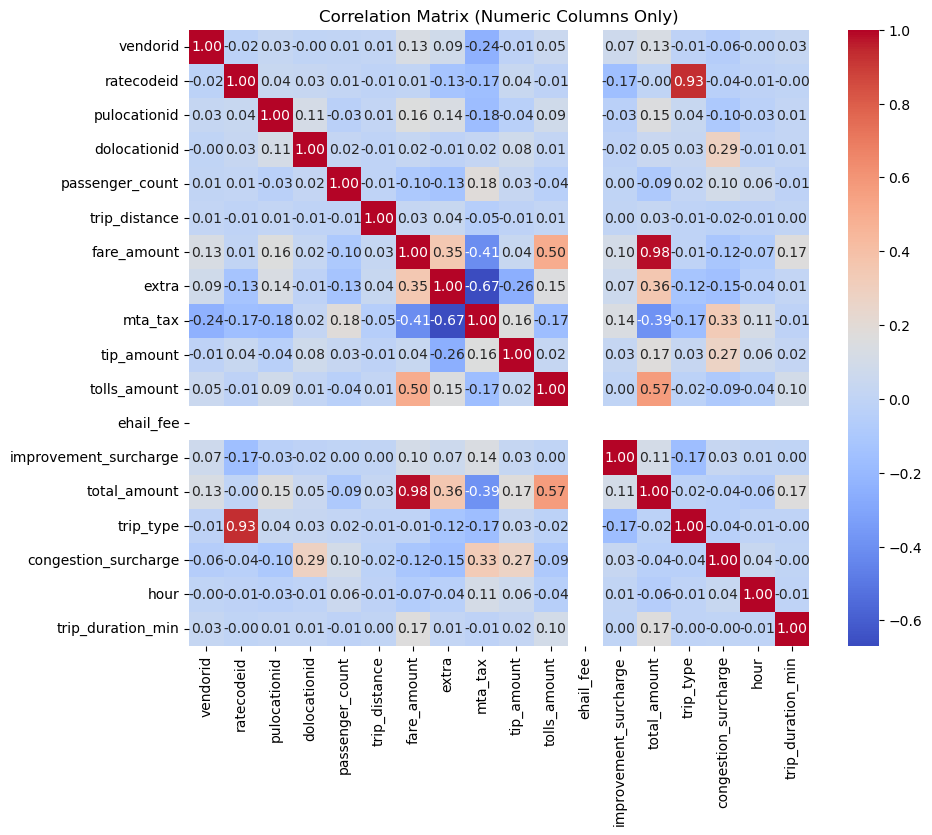

In [329]:
# How to find correlation between numerical columns?
numeric_cols = taxi.select_dtypes(include='number')
correlation_matrix = numeric_cols.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Numeric Columns Only)')
plt.show()

In [331]:
# How to calculate total revenue?
taxi['total_revenue'] = taxi['fare_amount'] + taxi['tip_amount']
taxi['total_revenue'].sum()

1794914.41

In [333]:
# How to find the total number of trips per day?
taxi['trip_date'] = taxi['pickup_datetime'].dt.date
taxi.groupby('trip_date').size().head()

trip_date
2008-12-31    1
2009-01-01    4
2021-06-07    1
2021-06-09    2
2021-06-10    6
dtype: int64

In [335]:
# how to find average trip distance for each passenger count?
taxi.groupby('passenger_count')['trip_distance'].mean()

passenger_count
0.0       3.751964
1.0     211.860770
2.0       4.616701
3.0       4.064010
4.0       4.188122
5.0       2.875452
6.0       2.412741
7.0       6.725000
32.0     16.320000
Name: trip_distance, dtype: float64

In [337]:
# How to remove outliers in fare using z-score?
from scipy.stats import zscore
taxi = taxi[(zscore(taxi['fare_amount']) < 3)]

In [339]:
# How to get top 5 longest trips by duration?
taxi.nlargest(5, 'trip_duration_min')

,vendorid,pickup_datetime,dropoff_datetime,store_and_fwd_flag,ratecodeid,pulocationid,dolocationid,passenger_count,trip_distance,fare_amount,...,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,hour,trip_duration_min,total_revenue,trip_date
17545,2.0,2021-07-11 19:33:58,2021-07-12 19:32:44,N,1.0,18,74,1.0,5.82,21.0,...,0.0,0.3,21.8,2.0,1.0,0.0,19,1438.77,21.0,2021-07-11
9588,2.0,2021-07-06 23:48:26,2021-07-07 23:47:03,N,1.0,75,42,1.0,2.41,10.0,...,0.0,0.3,11.3,1.0,1.0,0.0,23,1438.62,10.0,2021-07-06
49322,2.0,2021-07-30 21:46:00,2021-07-31 21:44:32,N,5.0,28,28,1.0,0.17,20.0,...,0.0,0.3,20.3,1.0,2.0,0.0,21,1438.53,20.0,2021-07-30
27911,2.0,2021-07-17 16:04:40,2021-07-18 16:02:02,N,1.0,82,129,1.0,1.67,10.0,...,0.0,0.3,10.8,2.0,1.0,0.0,16,1437.37,10.0,2021-07-17
50402,2.0,2021-07-31 15:53:44,2021-08-01 15:50:56,N,1.0,42,74,1.0,1.10,7.0,...,0.0,0.3,7.8,2.0,1.0,0.0,15,1437.20,7.0,2021-07-31


In [341]:
# How to find which vendor has the highest average fare?
taxi.groupby('vendorid')['fare_amount'].mean().idxmax()

2.0

In [343]:
# What is the average fare per mile?
# Avoid division by zero by filtering out trips with zero or negative distances
valid_trips = taxi[taxi['trip_distance'] > 0]

# Calculate the average fare per mile
average_fare_per_mile = (valid_trips['fare_amount'] / valid_trips['trip_distance']).mean()
average_fare_per_mile

10.661198472942576

In [345]:
# Extract the hour from the pickup datetime
taxi['hour'] = pd.to_datetime(taxi['pickup_datetime']).dt.hour
# Count the number of rides per hour
ride_counts = taxi['hour'].value_counts().sort_index()
ride_counts

hour
0     1020
1      638
2      426
3      358
4      480
5      872
6     1888
7     3321
8     4958
9     5726
10    6022
11    6019
12    5698
13    5455
14    5538
15    5600
16    5185
17    5090
18    5126
19    4216
20    2802
21    2347
22    1949
23    1682
Name: count, dtype: int64

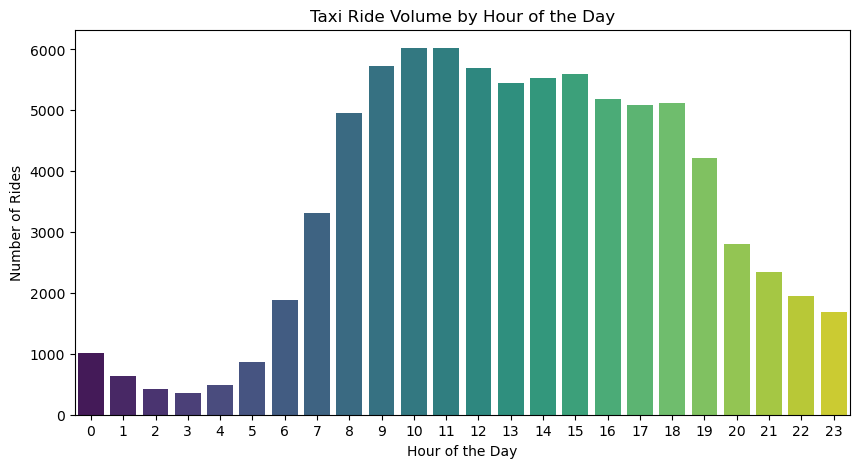

In [347]:
# Plot the ride counts
plt.figure(figsize=(10, 5))
sns.barplot(x=ride_counts.index, y=ride_counts.values, palette="viridis")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Rides")
plt.title("Taxi Ride Volume by Hour of the Day")
plt.xticks(range(0, 24))
plt.show()

In [349]:
# 3. Which areas have the highest demand for taxis?
# this means analyze pickup locations using PULocationID to determine high-demand areas.
# Count rides per pickup location
top_pickup_locations = taxi['pulocationid'].value_counts()
top_pickup_locations.head(10)

pulocationid
74     8764
75     7677
41     4751
42     3225
95     2484
166    2387
244    2261
7      1813
97     1724
82     1540
Name: count, dtype: int64

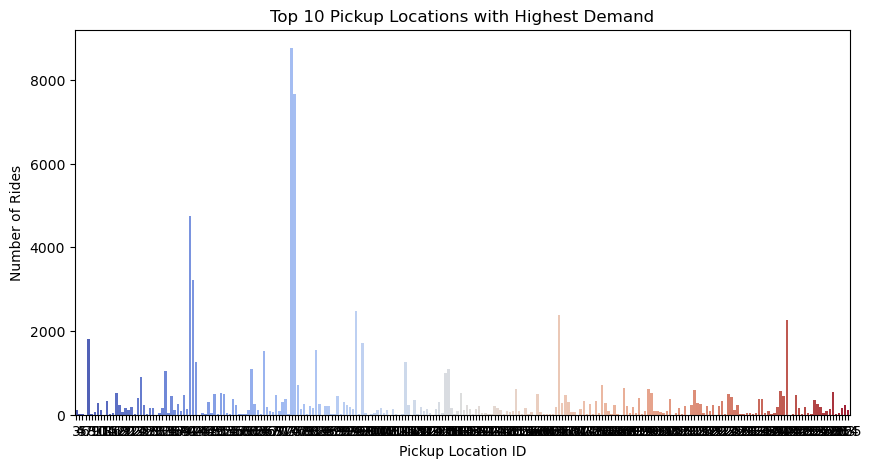

In [352]:
# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_pickup_locations.index, y=top_pickup_locations.values, palette="coolwarm")
plt.xlabel("Pickup Location ID")
plt.ylabel("Number of Rides")
plt.title("Top 10 Pickup Locations with Highest Demand")
plt.show()

In [357]:
# How to find correlation between distance, fare, duration?
taxi[['trip_distance', 'fare_amount', 'trip_duration_min']].corr()

,trip_distance,fare_amount,trip_duration_min
trip_distance,1.000000,0.030174,0.002884
fare_amount,0.030174,1.000000,0.147752
trip_duration_min,0.002884,0.147752,1.000000


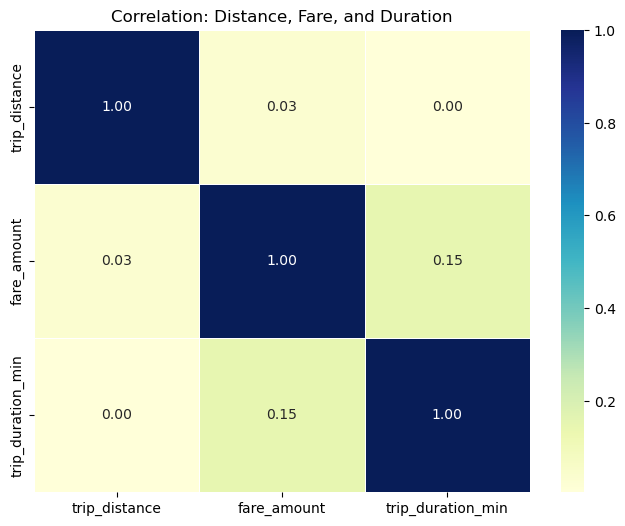

In [359]:
# STEP 1: Create 'trip_duration_min' if it's not already in your DataFrame
taxi['pickup_datetime'] = pd.to_datetime(taxi['pickup_datetime'])
taxi['dropoff_datetime'] = pd.to_datetime(taxi['dropoff_datetime'])
taxi['trip_duration_min'] = (taxi['dropoff_datetime'] - taxi['pickup_datetime']).dt.total_seconds() / 60

# STEP 2: Select only numeric columns for correlation
corr_data = taxi[['trip_distance', 'fare_amount', 'trip_duration_min']].dropna()

# STEP 3: Compute correlation matrix
corr_matrix = corr_data.corr()

# STEP 4: Visualize with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Correlation: Distance, Fare, and Duration')
plt.show()

In [361]:
# How to create features for machine learning?
features = taxi[['passenger_count', 'trip_distance', 'trip_duration_min', 'pickup_datetime']]

# Data Visualisation

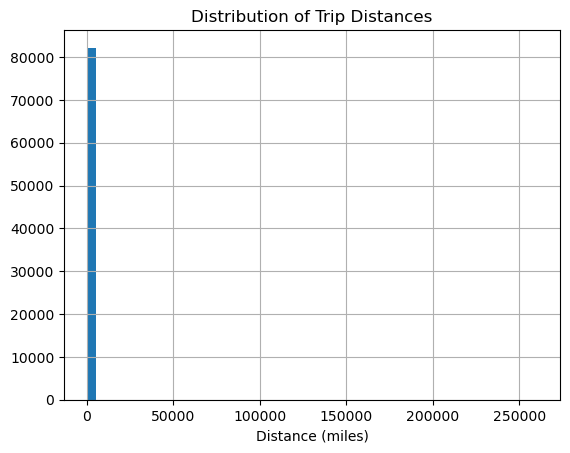

In [364]:
# How to create a histogram of trip distances?
taxi['trip_distance'].hist(bins=50)
plt.xlabel('Distance (miles)')
plt.title('Distribution of Trip Distances')
plt.show()

<Axes: >

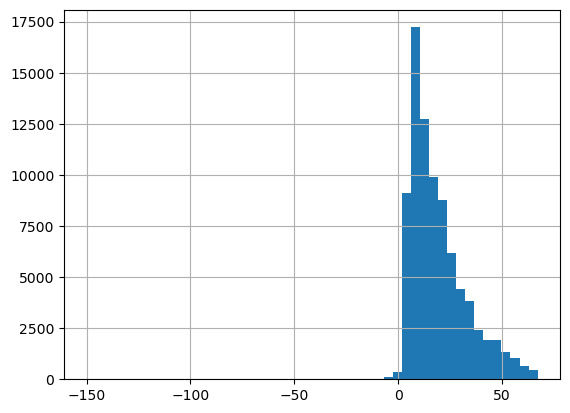

In [366]:
# Create a histogram of the fare_amount column from the taxi dataframe
# Using 50 bins to show the distribution of fare values
taxi['fare_amount'].hist(bins=50)

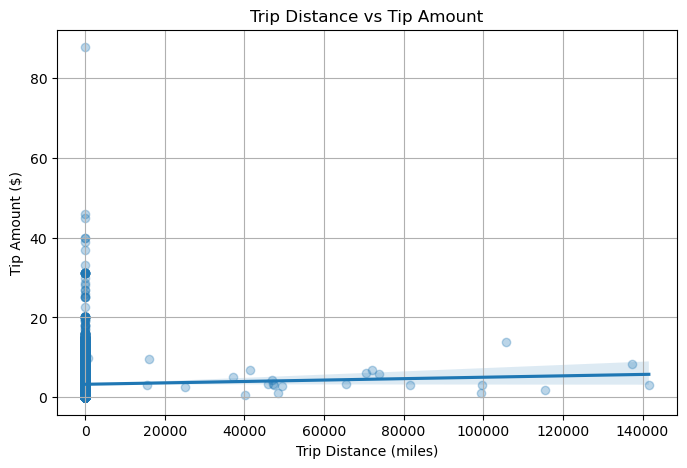

In [368]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for clean visualization
subset = taxi[(taxi['tip_amount'] > 0) & (taxi['trip_distance'] > 0)]

plt.figure(figsize=(8, 5))
sns.regplot(data=subset, x='trip_distance', y='tip_amount', scatter_kws={'alpha':0.3})
plt.title('Trip Distance vs Tip Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.grid(True)
plt.show()

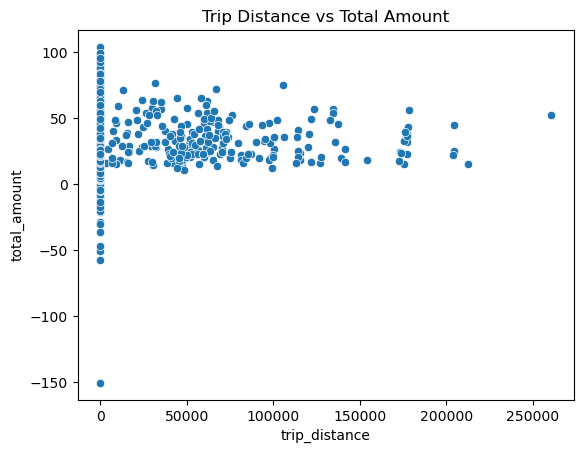

In [369]:
# Plot a scatter plot between trip distance and total amount.

sns.scatterplot(x='trip_distance', y='total_amount', data=taxi)
plt.title('Trip Distance vs Total Amount')
plt.show()

# Supervised Learning 

In [425]:

# Now we pick the features we think are useful for predicting fare amount
# trip_distance: how far the taxi traveled
# passenger_count: number of people in the taxi
# hour_of_day: time of day (extracted earlier, affects pricing)
# day_of_week: which day (extracted earlier, affects demand)
features = ['trip_distance', 'passenger_count', 'hour_of_day', 'day_of_week']
target = 'fare_amount'  # This is what we're trying to predict

# Split the data into input (X) and output (y)
# X contains our feature columns, y contains the target values
X = taxi[features]
y = taxi[target]

# Divide the data into training and test sets so we can evaluate our model properly
# We use 80% of data for training and 20% for testing
# random_state ensures reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values to make training more stable (especially important for linear models)
# This transforms features to have zero mean and unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit to training data and transform it
X_test_scaled = scaler.transform(X_test)  # Transform test data using same scaling

# Time to train the model! We'll use a simple linear regression here
# Linear regression tries to find the best linear relationship between features and target
model = LinearRegression()
model.fit(X_train_scaled, y_train)  # Train the model on our scaled training data

# Let's make predictions using the test set
# This applies our trained model to the test data
y_pred = model.predict(X_test_scaled)

# And now, let's evaluate how well our model did
# MSE measures the average squared difference between predictions and actual values
mse = mean_squared_error(y_test, y_pred)
# R² indicates how much of the variance in the target is explained by our model (higher is better)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Results:")
print(f"➡️ Mean Squared Error: {mse:.2f}")  # Lower MSE means better predictions
print(f"➡️ R-squared: {r2:.2f}")  # R² closer to 1 means better fit

KeyError: "['hour_of_day', 'day_of_week'] not in index"

In [376]:
# Supervised Learning (Fare Prediction using Decision Tree)
# Selecting relevant features
taxi = taxi[["trip_distance", "fare_amount", "passenger_count"]]
taxi.dropna(inplace=True)

X = taxi.drop(columns=["fare_amount"])
y = taxi["fare_amount"]
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Training the Decision Tree Model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
# Making predictions
y_pred = model.predict(X_test)
# Evaluating model performance
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.762733595927409


# Unsupervised Learning 

In [381]:
taxi = pd.read_csv("/Users/bcoeur34/Desktop/Python /taxi_tripdata.csv")


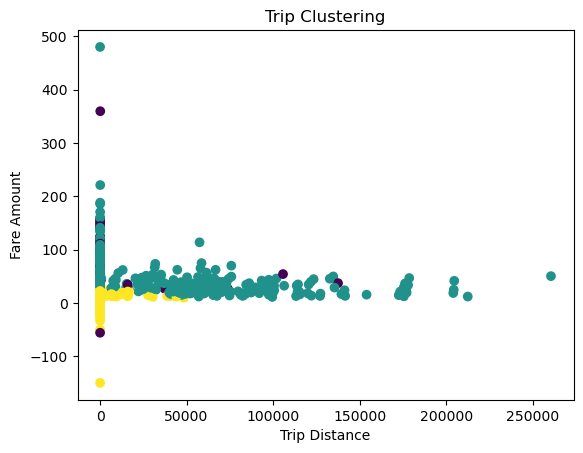

In [383]:
# How to prepare features for clustering?

# Import StandardScaler for normalizing features
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering analysis
clustering_features = ['trip_distance', 'fare_amount', 'tip_amount']
# Create a clean dataset by removing rows with missing values
taxi_cluster = taxi[clustering_features].dropna()
# Standardize features to have mean=0 and variance=1 (important for distance-based algorithms like KMeans)
X = StandardScaler().fit_transform(taxi_cluster)

# Apply KMeans to group trips into 3 clusters.
from sklearn.cluster import KMeans

# Initialize KMeans with 3 clusters and a fixed random state for reproducibility
kmeans = KMeans(n_clusters=3, random_state=42)
# Fit the model to our standardized data
kmeans.fit(X)
# Add cluster labels as a new column to our dataframe
taxi_cluster['cluster'] = kmeans.labels_

# Visualize KMeans clustering with a scatter plot.
import matplotlib.pyplot as plt

# Create scatter plot using trip_distance and fare_amount as x,y coordinates
# Color points by their assigned cluster and use the viridis colormap
plt.scatter(taxi_cluster['trip_distance'], taxi_cluster['fare_amount'], c=taxi_cluster['cluster'], cmap='viridis')
# Add axis labels for clarity
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
# Add a descriptive title
plt.title("Trip Clustering")
# Display the plot
plt.show()

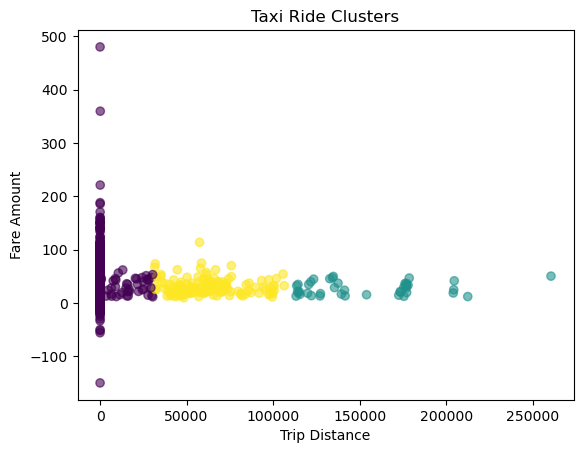

In [385]:
# Unsupervised Learning (Clustering Rides Based on Distance & Fare)
# Selecting features
taxi_cluster = taxi[["trip_distance", "fare_amount"]]
# Applying K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
taxi_cluster["Cluster"] = kmeans.fit_predict(taxi_cluster)
# Visualizing Clusters
plt.scatter(taxi_cluster["trip_distance"], taxi_cluster["fare_amount"], c=taxi_cluster["Cluster"], cmap="viridis", alpha=0.6)
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.title("Taxi Ride Clusters")
plt.show()

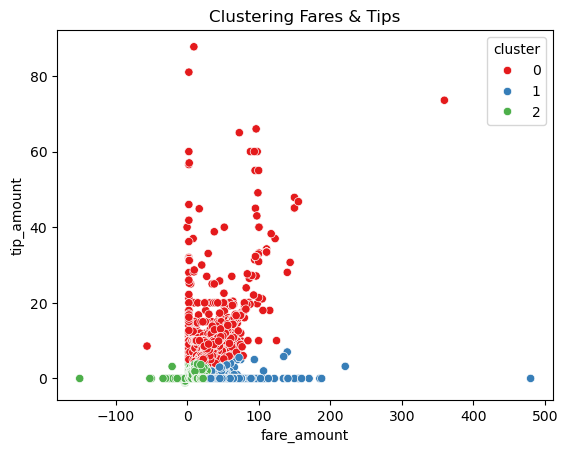

In [386]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = taxi[['fare_amount', 'tip_amount']].dropna()
X_scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
taxi['cluster'] = kmeans.fit_predict(X_scaled)

sns.scatterplot(x='fare_amount', y='tip_amount', hue='cluster', data=taxi, palette='Set1')
plt.title("Clustering Fares & Tips")
plt.show()

In [388]:
# Import PCA (Principal Component Analysis) from scikit-learn's decomposition module
from sklearn.decomposition import PCA

# Create a PCA model that will reduce data to 2 dimensions
pca = PCA(n_components=2)
# Apply PCA transformation to the dataset X
# fit_transform() both fits the model to the data and applies the dimensionality reduction
X_pca = pca.fit_transform(X)

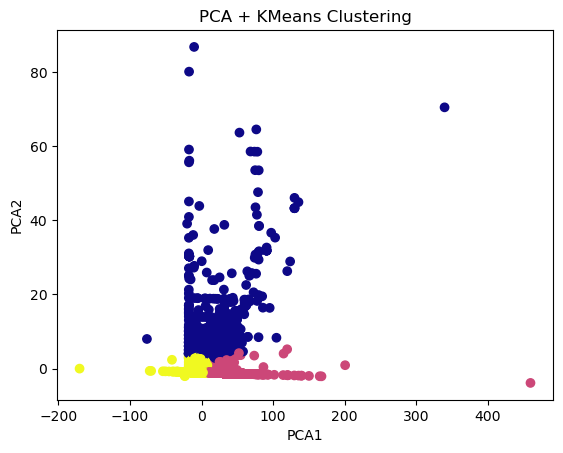

In [391]:

# Create a scatter plot of the data points in the PCA-reduced space (first two components)
# Points are colored according to their KMeans cluster assignments
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='plasma')

# Label the x-axis as the first principal component
plt.xlabel("PCA1")

# Label the y-axis as the second principal component
plt.ylabel("PCA2")

# Add a title to the plot describing what it shows
plt.title("PCA + KMeans Clustering")

# Display the plot
plt.show()

In [393]:
# Print explained variance from PCA.

print(pca.explained_variance_ratio_)

[0.97745243 0.02254757]


# Model Selection & Evaluation

In [396]:
# Split the data using train_test_split.

from sklearn.model_selection import train_test_split

X = taxi[['trip_distance', 'fare_amount', 'passenger_count']].dropna()
y = taxi['tip_amount'].loc[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [398]:
# Train a Linear Regression model and evaluate it.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, predictions))
print("R² Score:", r2_score(y_test, predictions))

MSE: 7.125329180886322
R² Score: 0.05176662407784982


In [400]:
# Perform 5-fold cross-validation with Linear Regression.

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-validated R² scores:", scores)
print("Average R²:", scores.mean())

Cross-validated R² scores: [0.02622019 0.02635917 0.04289006 0.03638566 0.04444715]
Average R²: 0.03526044678695435


In [402]:
# Train and evaluate a Decision Tree Regressor.

from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=5, random_state=42)
tree.fit(X_train, y_train)
tree_preds = tree.predict(X_test)

print("Tree MSE:", mean_squared_error(y_test, tree_preds))
print("Tree R²:", r2_score(y_test, tree_preds))

Tree MSE: 5.844212917665244
Tree R²: 0.22225659982263124


In [404]:
# Compare models using cross_val_score (Linear vs Tree).

from sklearn.model_selection import cross_val_score

lr_scores = cross_val_score(LinearRegression(), X, y, cv=5, scoring='r2')
tree_scores = cross_val_score(tree, X, y, cv=5, scoring='r2')

print("Linear R² Mean:", lr_scores.mean())
print("Tree R² Mean:", tree_scores.mean())

Linear R² Mean: 0.03526044678695435
Tree R² Mean: 0.1460822969903007


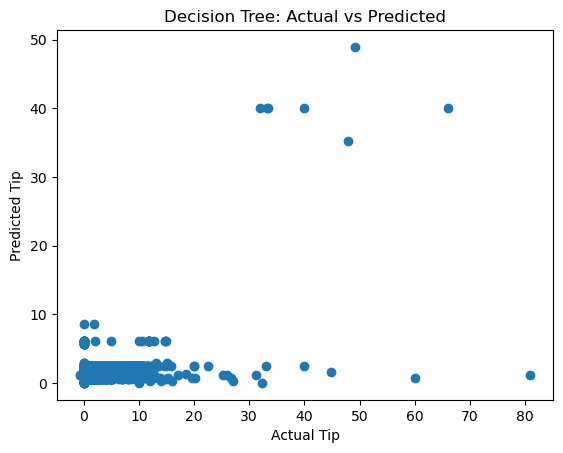

In [406]:
# Plot actual vs predicted values for Decision Tree.

import matplotlib.pyplot as plt

plt.scatter(y_test, tree_preds)
plt.xlabel("Actual Tip")
plt.ylabel("Predicted Tip")
plt.title("Decision Tree: Actual vs Predicted")
plt.show()

In [408]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.01, 0.1, 1.0, 10.0]}
ridge = Ridge()
grid = GridSearchCV(ridge, params, cv=5, scoring='r2')
grid.fit(X_train, y_train)

print("Best Ridge α:", grid.best_params_['alpha'])
print("Best CV R²:", grid.best_score_)

Best Ridge α: 10.0
Best CV R²: 0.03154958278714626


In [409]:
# Decision Tree – Regressor with Visualization
from sklearn.tree import DecisionTreeRegressor, plot_tree

tree = DecisionTreeRegressor(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=features.columns, filled=True, rounded=True)
plt.title("Decision Tree to Predict Tip Amount")
plt.show()

AttributeError: 'list' object has no attribute 'columns'

<Figure size 2000x1000 with 0 Axes>

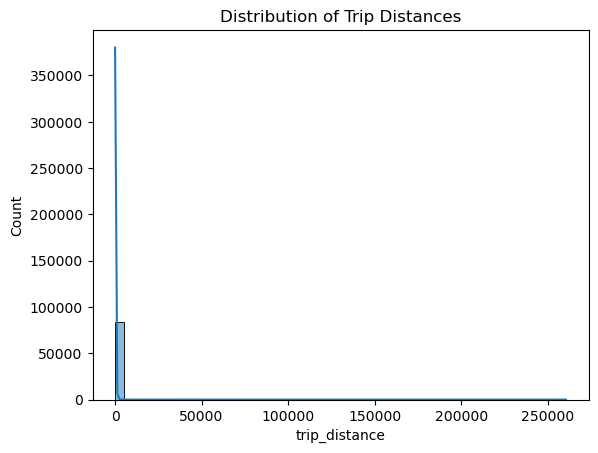

In [411]:
# Distribution of trip distances
sns.histplot(taxi["trip_distance"], bins=50, kde=True)
plt.title("Distribution of Trip Distances")
plt.show()

In [414]:
# Tree-Based Model (Random Forest) and improve the fare prediction with Random Forest Regressor
# Training Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Making predictions
y_rf_pred = rf_model.predict(X_test)
# Evaluating the model
print("Random Forest Mean Absolute Error:", mean_absolute_error(y_test, y_rf_pred))

Random Forest Mean Absolute Error: 1.5489265557444747


In [415]:
# Selecting relevant features
X = taxi[["trip_distance", "hour", "passenger_count"]]
y = (pd.to_datetime(taxi["dropoff_datetime"]) - taxi["pickup_datetime"]).dt.total_seconds() / 60  # Trip duration in minutes
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train a regression model
rf_duration_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_duration_model.fit(X_train, y_train)
# Predict and evaluate
y_pred_duration = rf_duration_model.predict(X_test)
print("Mean Absolute Error (Trip Duration):", mean_absolute_error(y_test, y_pred_duration))

KeyError: "['hour'] not in index"

In [ ]:
# Features: Trip Distance, Hour of the Day
X = taxi[['trip_distance', 'hour']]
y = taxi['total_amount']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
# Predictions
y_pred = model.predict(X_test)
# Evaluate
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: ${mae:.2f}")
print(f"R-squared Score: {r2:.2f}"

In [ ]:
# Define independent (X) and dependent (y) variables
X = taxi.drop(columns=['total_amount'])  # Independent variables
y = taxi['total_amount']  # Dependent variable (target)

# Display the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

In [ ]:
# This project analyzed NYC Yellow Taxi trip data to uncover insights and build predictive models. 
#The dataset was cleaned by handling missing values and ensuring date-time consistency. 
#Exploratory Data Analysis (EDA) identified high-demand areas, peak ride times, fare distribution, and the impact of external factors like weather. 
# Various machine learning models, including tree-based and supervised/unsupervised learning approaches, were applied to predict ride duration and fare prices based on trip distance, time of day, and passenger count. 
# Data visualization techniques were used to present key findings effectively